# Feature importance

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_excel("data_cleaned.xlsx")
data = data.drop(data.columns[5], axis=1)# to je zelo slaba koda
data = data.drop('Unnamed: 0', axis=1)
data = data.apply(pd.to_numeric, errors='coerce')

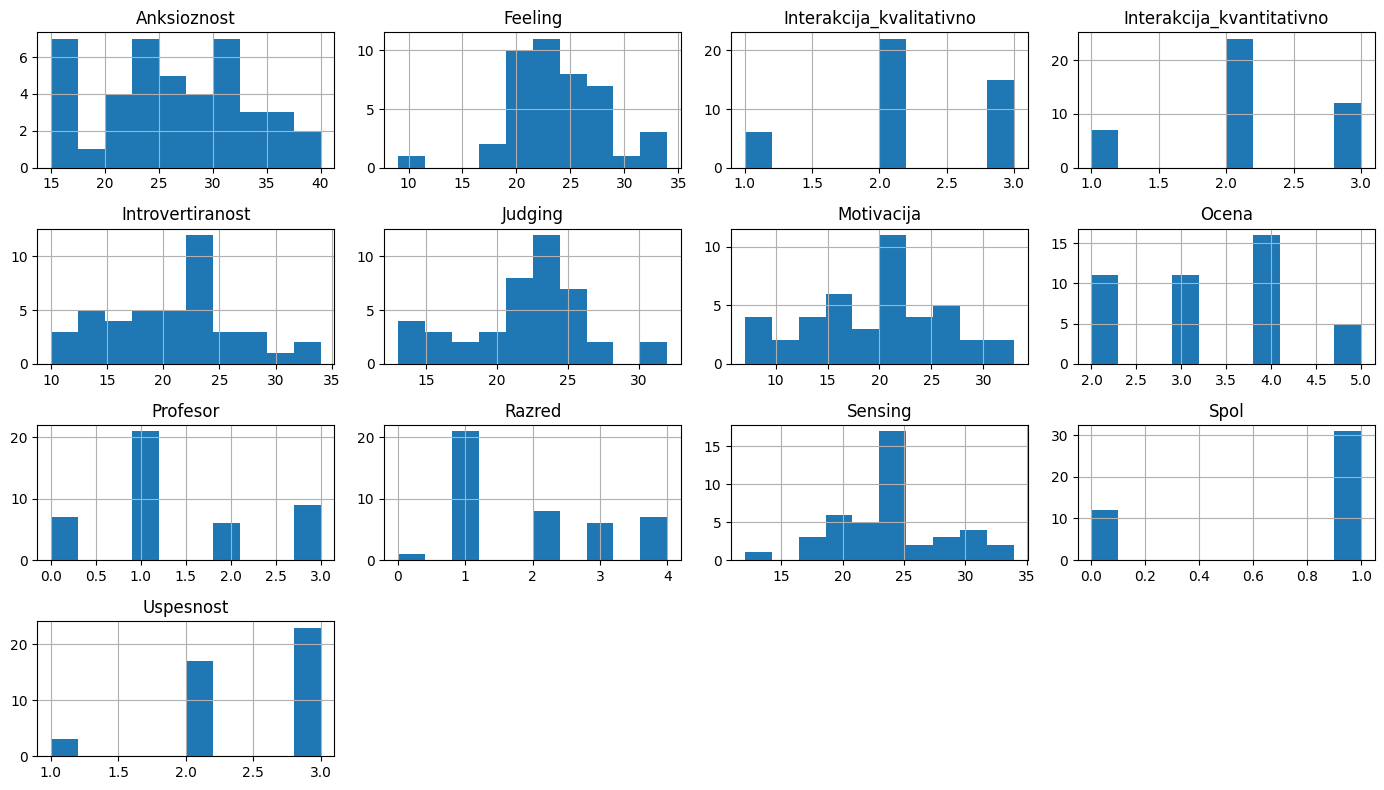

In [2]:
exclude = ['Unnamed: 0']
data.loc[:, data.columns.difference(exclude)].hist(figsize=(14,8))
plt.tight_layout()
plt.show()

In [3]:
X = data.drop("Uspesnost", axis=1)
y = data["Uspesnost"]

Text(0.5, 1.0, 'Mutual information between predictors and target')

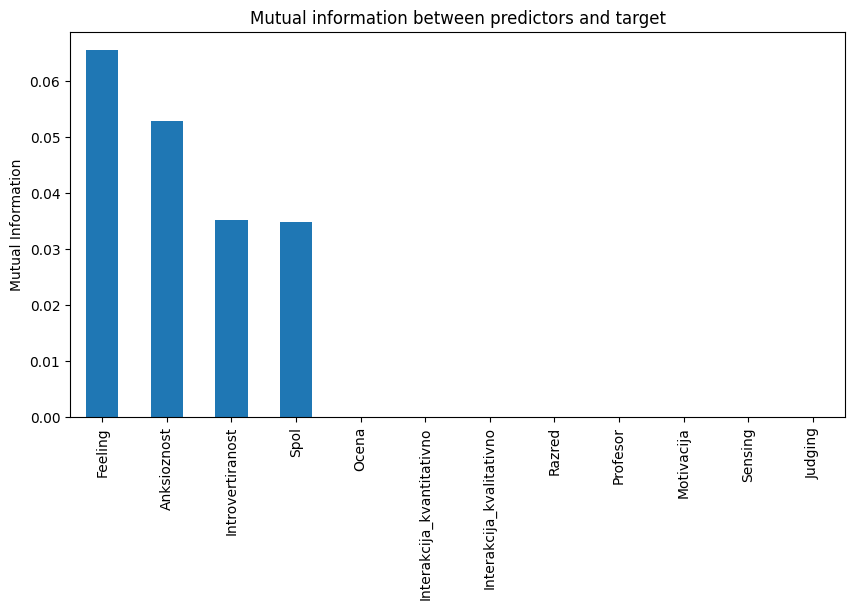

In [4]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X, y)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

In [5]:
mi.sort_values(ascending=False)

Feeling                      0.065437
Anksioznost                  0.052851
Introvertiranost             0.035094
Spol                         0.034724
Ocena                        0.000000
Interakcija_kvantitativno    0.000000
Interakcija_kvalitativno     0.000000
Razred                       0.000000
Profesor                     0.000000
Motivacija                   0.000000
Sensing                      0.000000
Judging                      0.000000
dtype: float64

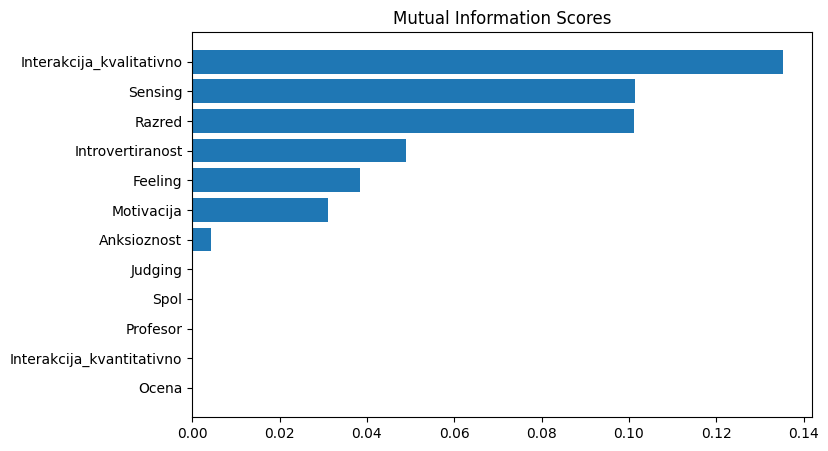

In [6]:
discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# Korelacijska matrika

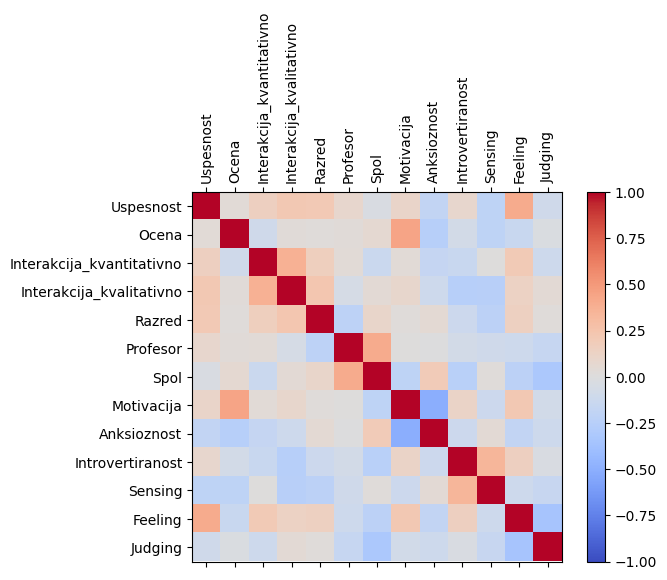

In [7]:
import matplotlib.pyplot as plt

corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

# Hi kvadrat

Za tega mora biti data kategoricna. To lahko naredimo z dajanjem psiholoskih 0-100 v klase 0-24, 25-39, ...

In [8]:
"""import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(data)

#Feature Selection
testColumns = ['Spol','Glavna_diagnoza', 'starost']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="responder" )"""

'import pandas as pd\nimport numpy as np\nimport scipy.stats as stats\nfrom scipy.stats import chi2_contingency\n\nclass ChiSquare:\n    def __init__(self, dataframe):\n        self.df = dataframe\n        self.p = None #P-Value\n        self.chi2 = None #Chi Test Statistic\n        self.dof = None\n        \n        self.dfObserved = None\n        self.dfExpected = None\n        \n    def _print_chisquare_result(self, colX, alpha):\n        result = ""\n        if self.p<alpha:\n            result="{0} is IMPORTANT for Prediction".format(colX)\n        else:\n            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)\n\n        print(result)\n        \n    def TestIndependence(self,colX,colY, alpha=0.05):\n        X = self.df[colX].astype(str)\n        Y = self.df[colY].astype(str)\n        \n        self.dfObserved = pd.crosstab(Y,X) \n        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)\n        self.p = p\n        self.c

In [9]:
"""data.dtypes"""

'data.dtypes'

RFE 
https://machinelearningmastery.com/rfe-feature-selection-in-python/